In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

<h1>Part 1. Predicting images</h1>

In [0]:
data = keras.datasets.fashion_mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

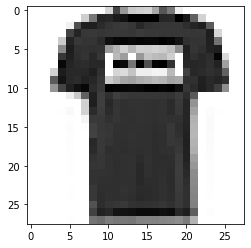

In [0]:
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.show()

In [0]:
# normalise data to reduce range to 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
# softmax changes the output into a probability, class chosen based on highest probility
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)), # 28x28 matrix flattened len 784
                          keras.layers.Dense(128, activation = "relu"), # number of nodes in hidden layer
                          keras.layers.Dense(10, activation="softmax") # number of classes
])

In [0]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [0]:
model.fit(train_images, train_labels, epochs=5)
# epochs = number of times the model will run through the whole dataset. 
# epochs = 5: the model sees all the data 5 times

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1978 - accuracy: 0.9264
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1943 - accuracy: 0.9268
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1881 - accuracy: 0.9286
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1834 - accuracy: 0.9310
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1822 - accuracy: 0.9310


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3458 - accuracy: 0.8721


In [0]:
# increasing the number of epochs by 2x did not improve model by 2x. diminishing returns
# we decrease the number of epochs to 5

In [0]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[0])])

Ankle boot


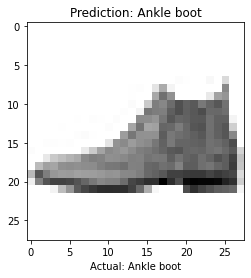

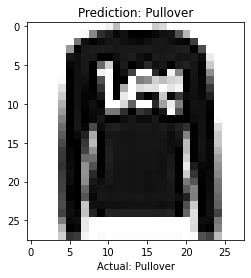

In [0]:
# to visualise what was predicted vs what it actually is
for i in range(2):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + class_names[test_labels[i]])
    plt.title("Prediction: " + class_names[np.argmax(predictions[i])])
    plt.show()

---
<h1>Part 2. Predicting text data</h1>


In [0]:
data = keras.datasets.imdb

In [0]:
(train_data, train_labels), (test_data, test_labels) = data.load_data(num_words=88000)
# each word is mapped to an integer

In [0]:
# tuples of word, integer key
word_index = data.get_word_index()

In [0]:
# dictionary to map word to key
word_index = {k:v+3 for k, v in word_index.items()}
# starts at +3 to include extra word, integer key pairs

word_index["<PAD>"]=0
word_index["<START>"]=1
word_index["<UNK>"]=2
word_index["<UNUSED>"]=3

In [0]:
# reverse the dictionary to map key to word
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [0]:
# ensure that the training and test data are of the same shape, missing words will be added with <PAD>
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], padding="post", maxlen=250)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], padding="post", maxlen=250)

In [0]:
model = keras.Sequential()
model.add(keras.layers.Embedding(88000, 16)) # group word that are similar by reducing angle between vectors and then transform them into word vectors of 16 dimensions (ax+by+....16i16p) 
model.add(keras.layers.GlobalAveragePooling1D()) # takes previous dimensions of input and reduces dimensions
model.add(keras.layers.Dense(16, activation="relu")) # hidden layer
model.add(keras.layers.Dense(1, activation="sigmoid")) # output layer

In [99]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          1408000   
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 1,408,289
Trainable params: 1,408,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [0]:
x_val = train_data[:10000]
x_train = train_data[10000:]

y_val = train_labels[:10000]
y_train = train_labels[10000:]

In [102]:
fitModel = model.fit(x_train, y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val), verbose=1)

Epoch 1/40
30/30 [==============================] - 1s 27ms/step - loss: 0.6917 - accuracy: 0.5715 - val_loss: 0.6893 - val_accuracy: 0.7388
Epoch 2/40
30/30 [==============================] - 1s 23ms/step - loss: 0.6850 - accuracy: 0.7680 - val_loss: 0.6804 - val_accuracy: 0.7173
Epoch 3/40
30/30 [==============================] - 1s 24ms/step - loss: 0.6713 - accuracy: 0.7659 - val_loss: 0.6631 - val_accuracy: 0.7555
Epoch 4/40
30/30 [==============================] - 1s 23ms/step - loss: 0.6447 - accuracy: 0.7945 - val_loss: 0.6330 - val_accuracy: 0.7641
Epoch 5/40
30/30 [==============================] - 1s 23ms/step - loss: 0.6044 - accuracy: 0.8111 - val_loss: 0.5925 - val_accuracy: 0.7988
Epoch 6/40
30/30 [==============================] - 1s 24ms/step - loss: 0.5539 - accuracy: 0.8314 - val_loss: 0.5464 - val_accuracy: 0.8123
Epoch 7/40
30/30 [==============================] - 1s 23ms/step - loss: 0.4983 - accuracy: 0.8527 - val_loss: 0.4999 - val_accuracy: 0.8281
Epoch 8/40
30

In [103]:
results = model.evaluate(test_data, test_labels)
print(results)

782/782 [==============================] - 2s 2ms/step - loss: 0.3383 - accuracy: 0.8718
[0.3382800817489624, 0.8717600107192993]


In [0]:
def decode_review(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

In [105]:
test_review=test_data[0]
predict=model.predict([test_review])
print("Review: ", predict)
print(decode_review(test_review))
print("Prediction: ", str(predict[0]))
print("Actual: ", str(test_labels[0]))
print(results)

Review:  [[4.0554058e-12]
 [2.0637743e-12]
 [9.9450833e-01]
 [7.5158745e-04]
 [6.4970695e-06]
 [9.9446023e-01]
 [1.0000000e+00]
 [3.3337828e-03]
 [3.3337828e-03]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9999905e-01]
 [9.8328662e-01]
 [9.1681507e-09]
 [4.4182513e-04]
 [9.8328662e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.3801744e-29]
 [1.0000000e+00]
 [9.8328662e-01]
 [2.7084857e-01]
 [9.9999368e-01]
 [7.9781112e-31]
 [7.9781112e-31]
 [7.9781112e-31]
 [3.3337828e-03]
 [3.3337828e-03]
 [9.9189723e-01]
 [1.7092585e-09]
 [9.9999583e-01]
 [3.7449170e-04]
 [9.4181311e-01]
 [2.4834412e-11]
 [2.0904489e-08]
 [1.5894914e-03]
 [2.0750005e-07]
 [7.5158745e-04]
 [6.4970695e-06]
 [2.9675035e-05]
 [1.0000000e+00]
 [9.4221612e-08]
 [7.6670170e-01]
 [1.0000000e+00]
 [1.6521264e-16]
 [3.5995061e-05]
 [9.9999583e-01]
 [7.5158745e-04]
 [4.1010276e-07]
 [9.9999952e-01]
 [3.5995061e-05]
 [7.9908583e-05]
 [9.8489988e-01]
 [9.9999905e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.5175635e-05]
 [1.0000000e+00]
 [5.2

In [0]:
model.save("model.h5")

In [0]:
model = keras.models.load_model("model.h5")